## [Tømming av sammenkoblede vanntanker](https://www.math.ttu.edu/~klong/ODESystems.pdf)

Vi ser på to vanntanker (åpne for luft på toppen) som er koblet sammen nær bunnen via et rør. I tillegg har hver tank også et dreneringsrør.
Vann strømmer mellom tankene samt ut gjennom avløpene. En skjematisk tegning av oppsettet er vist på figuren under.

![koblede kar](https://github.com/mbr085/V25MAT102/blob/main/notebooks/uke6/koblede_kar.png?raw=1)
[Av Katharine Long](https://www.math.ttu.edu/~klong/)

Hydrostatikk forteller oss at trykket på bunnen av en vannsøyle med høyde $h$ er $p = \rho gh$, der $\rho$ er vanntettheten og $g$ er gravitasjonsakselerasjonen. Du har kanskje sett Hagen-Poiseuille-loven for laminær strømning gjennom et sylindrisk rør: Den volumetriske strømningstakten $Q$ (volum væske per tidsenhet) bestemmes av trykkforskjellen $\Delta p$ mellom rørenes ender, rørenes geometri, og væskens viskositet:

$$
Q = \frac{\pi a^4 \Delta p}{8 \mu L}
$$

hvor a er rørradius, L er rørlengde og μ er den dynamiske viskositeten til væsken. 

Ifølge denne loven er strømningstakten fra tank 1 til tank 2:

$$
Q_{12} = \frac{\pi a^4 \rho g}{8 \mu L} (h_1 - h_2)
$$

Strømningstaktene i avløpsrørene er:
$$
Q_{10} = \frac{\pi a^4 \rho g}{8 \mu L} h_1
$$

og

$$
Q_{20} = \frac{\pi a^4 \rho g}{8 \mu L} h_2
$$

Volumet av vann i tank 1 endres med takten:

$$
\frac{dV_1}{dt} = -Q_{12} - Q_{10}
$$

og i tank 2 endres volumet med takten:
$$
\frac{dV_2}{dt} = Q_{12} - Q_{20}
$$

Ved å merke oss at vannvolumet $V_i$ er søylehøyden $h_i$ ganget med arealet $A$ av tankens horisontale tverrsnitt, finner vi:

$$
\frac{dh_1}{dt} = \frac{\pi a^4 \rho g}{8 \mu L A} (-2 h_1 + h_2)
$$

og

$$
\frac{dh_2}{dt} = \frac{\pi a^4 \rho g}{8 \mu L A} (h_1 - 2 h_2)
$$

Størrelsen $ \frac{1}{\tau} \equiv \frac{\pi a^4 \rho g}{8 \mu L A} $ har dimensjonen tid$^{-1}$. Ved å gjøre transformasjonen til en dimensjonsløs tidsvariabel $\hat{t} = \frac{t}{\tau} $, $d\hat{t} = \tau^{-1} dt$, og deretter ignorere “hattene” på $\hat{t}$, får vi likningene:

$$
h_1' = -2h_1 + h_2
$$

og

$$
h_2' = h_1 - 2h_2
$$

## Reformulering

La oss skrive $x_0 = h_1(t_0)$ for høyden i den første tanken til tiden $t_0$ og
$y_0 = h_2(t_0)$ for høyden i den andre tanken til tiden $t_0$.

Skriver vi videre $x(t) = h_1(t)$ og $y(t) = h_2(t)$ er vi kommet frem til systemet
$$x'(t) = -2x(t) + y(t) = f(x, x(t), y(t)), \quad \text{med} \quad x(t_0) = x_0$$
og
$$y'(t) = x(t) - 2y(t) = g(x, x(t), y(t)), \quad \text{med} \quad y(t_0) = y_0$$
Dette systemet kan vi også løse med Eulers metode. Vi vil senere også finne eksakte løsninger for dette systemet.

In [1]:
import numpy as np

def euler_method(f, g, t0, tn, x0, y0, n):
  """
  Anvender Eulers metode for å løse differensialligningen x' = f(t, x, y) og y' = g(t, x, y).

  Args:
    f: Funksjonen som representerer x-delen av høyre side av differensialligningen.
    g: Funksjonen som representerer y-delen av høyre side av differensialligningen.
    t0: Startverdien for t.
    tn: Sluttverdien for t.
    x0: Startverdien for x.
    y0: Startverdien for y.
    n: Antall steg.

  Returns:
    En NumPy array som inneholder de approksimerte verdiene for x i hvert steg,
    En NumPy array som inneholder de approksimerte verdiene for y i hvert steg,
  """

  # Lager en array med t-verdier fra t0 til tn med n+1 punkter
  t_values = np.linspace(t0, tn, n + 1)
  # Initialiserer listene for x- og y-verdiene med startverdiene
  x_values = [x0]
  y_values = [y0]
  # Beregner steglengden
  delta_t = t_values[1] - t_values[0]

  # Gjennomfører Eulers metode for hvert steg
  for i in range(n):
    # Beregner neste x-verdi
    x_next = x_values[-1] + delta_t * f(t_values[i], x_values[-1], y_values[-1])
    # Beregner neste y-verdi
    y_next = y_values[-1] + delta_t * g(t_values[i], x_values[-1], y_values[-1])
    # Legger til de nye verdiene i listene
    x_values.append(x_next)
    y_values.append(y_next)

  # Returnerer t-verdiene og de beregnede x- og y-verdiene som NumPy arrays
  return t_values, np.array(x_values), np.array(y_values)

In [2]:
# Definerer funksjonene f og g

def f(t, x, y):
  return -2*x + y

def g(t, x, y):
  return x - 2*y

In [3]:
# Setter startbetingelser og parametere
t0 = 0   # Startverdi for t (tid)
x0 = 1.6  # Startverdi for x
y0 = 0.3  # Startverdi for y
tn = 5   # Sluttverdi for t (tid)
n = 1000  # Antall steg i beregningen

# Bruker Eulers metode for å løse differensialligningen
t_values, x_values, y_values = euler_method(f, g, t0, tn, x0, y0, n)

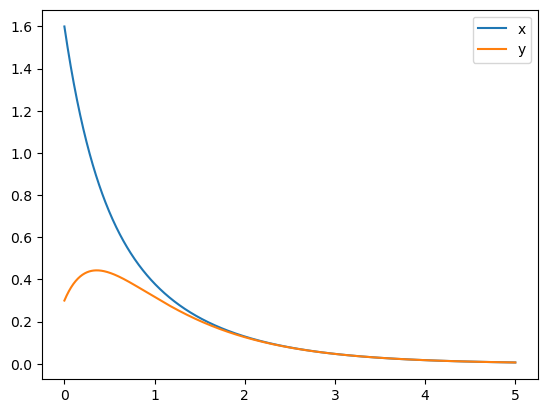

In [5]:
import matplotlib.pyplot as plt

plt.plot(t_values, x_values, label='x')
plt.plot(t_values, y_values, label='y')
plt.legend()

## Oppgave

**Gi en beskrivelse av hva figuren under forteller om løsningen til differensialligningen**

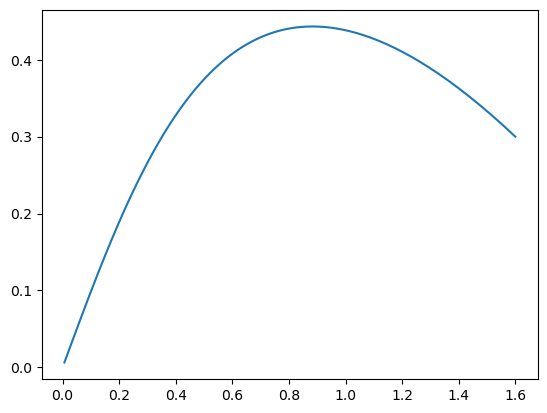

In [6]:
plt.plot(x_values, y_values);